In [1]:
import math
import matplotlib.pyplot as plt

In [2]:
rules = {
    'X': ['F', '+', '[', '[', 'X', ']', '-', 'X', ']', '-', 'F', '[', '-', 'F', 'X', ']', '+', 'X'],
    'F': ['F', 'F']
}

In [3]:
def step_generator():
    stack = ['-', 'X']

    while True:
        new_stack = []
        for element in stack:
            if element in rules.keys():
                new_stack.extend(rules[element])
            else:
                new_stack.append(element)

        yield new_stack
        stack = new_stack


class Draw:
    def __init__(self, title):
        self.x, self.y = 0, 0
        self.angle = 0
        self.stk = []
        self.length = 10
        self.it = title

    def forward(self):
        next_x = self.x - math.sin(math.radians(self.angle)) * self.length
        next_y = self.y + math.cos(math.radians(self.angle)) * self.length
        plt.plot([self.x, next_x], [self.y, next_y])
        self.x, self.y = next_x, next_y

    def left(self):
        self.angle += 25

    def right(self):
        self.angle -= 25

    def push(self):
        self.stk.append([self.x, self.y, self.angle])

    def pop(self):
        self.x, self.y, self.angle = self.stk.pop()

    def draw(self, stack):
        drawing_rules = {
            'F': self.forward,
            '+': self.left,
            '-': self.right,
            '[': self.push,
            ']': self.pop,
        }

        for element in stack:
            if element in drawing_rules.keys():
                drawing_rules[element]()

        plt.axis('equal')
        plt.title(self.it)
        plt.show()

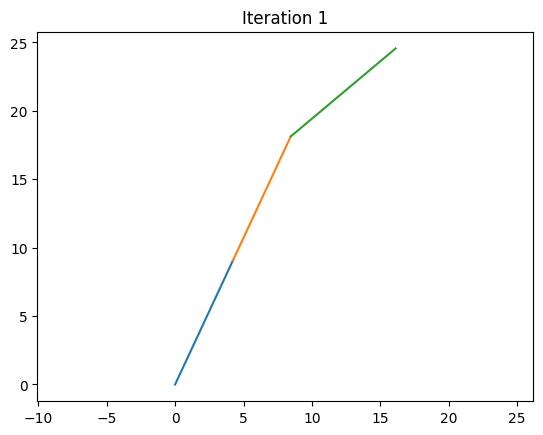

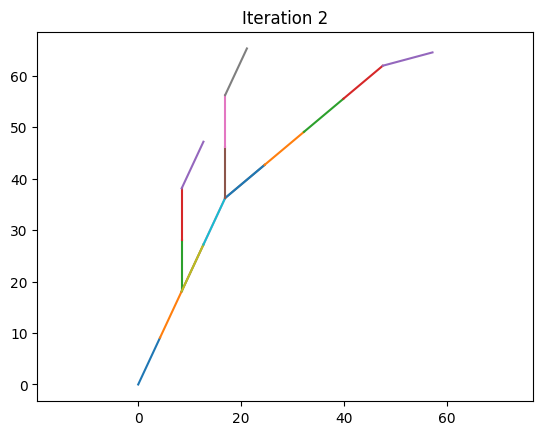

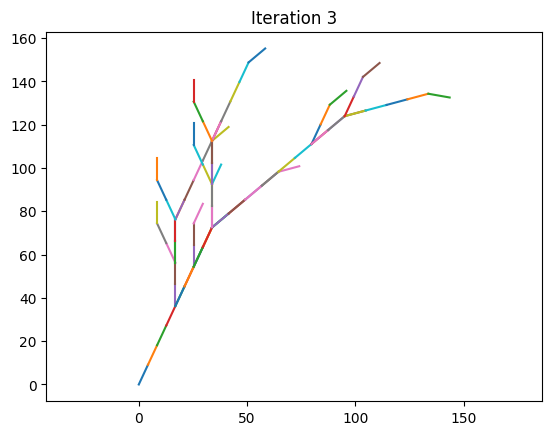

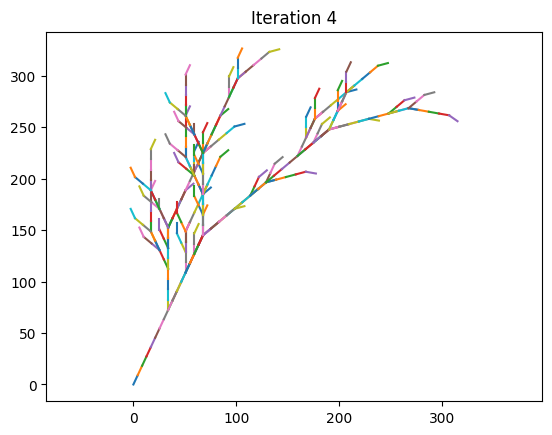

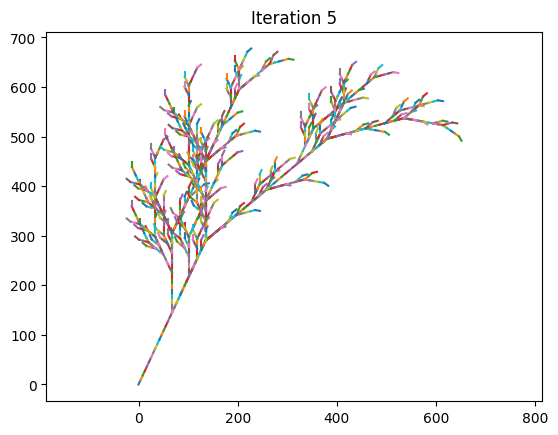

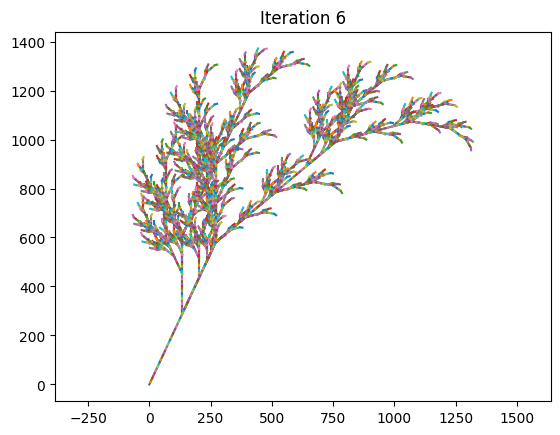

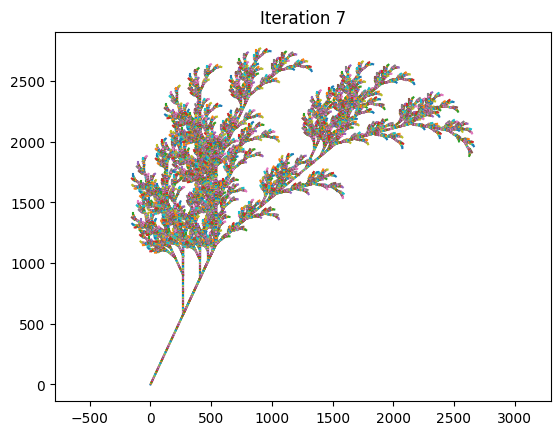

In [4]:
gen = step_generator()
results = [next(gen) for _ in range(7)]

for i, result in enumerate(results):
    Draw(f'Iteration {i+1}').draw(result)